# CardioML



Elaborato di Programmazione di Applicazioni Data Intensive - 2023

Membri del Gruppo:
- Matteo Iorio
- Fabio Vincenzi
- Stefano Furi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_style("whitegrid")

## Creazione del DataFrame

Ci siamo posti l'obbiettivo di realizzare un progetto che **possa veramente risultare utile** per alcuni professionisti del settore. Quello che andremo a studiare è un problema che riguarda i fanciulli di tenera età, più in particolare andremo ad analizzare i *risultati di rilevazioni cardiache*, andando a determinare se avranno o meno complicanze cardiache patologiche. 

Il dataset utilizzato riguarda una serie di misurazioni effettuate attraverso [cardiotocografia](https://it.wikipedia.org/wiki/Cardiotocografia), consultabile presso [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/cardiotocography#).



Lo scopo di questo elaborato verrà scritto qui molto presto :)

Decidiamo se mettere il `setup.py` con link qui direttamente alla repo github, così se i prof chiedono solo il file jupyter, possono tranquillamente usarlo senza clonare l'intera repo, mentre invece per i temerari che clonano l'intera repo, il dataset è già qui integrato.

## Preparazione del dataset

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/S-furi/CardioML/main/data/ctg.csv?token=GHSAT0AAAAAAB2INSX3OMMLZ7L45MTIRBW2ZEB3QJQ", delimiter=';')

In [3]:
raw_df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,01/12/96,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1



*   **file_name**: Nome del file che contiene i dati della cardiotografia. È un identificatore unico per il file.
*   **date**: Data relativa alla registrazione della cardiotografia. Indica la data in cui è stato eseguito l'esame.
*   **seg_file**: Nome del file di segmentazione associato ai dati della 
cardiotografia. Può contenere informazioni sulla suddivisione temporale dei dati.
*   **start_instant**: Istante di inizio della registrazione della cardiotografia. Indica il momento in cui i dati sono stati registrati.
end_instant: Istante di fine della registrazione della cardiotografia. Indica il momento finale in cui i dati sono stati registrati.
*   **medical_baseline**: Baseline medica, rappresenta la linea di base dei segnali registrati durante l'esame.
*   **sisproto_baseline**: Baseline di riferimento, rappresenta una linea di base standard usata per confrontare i segnali registrati.
*   **heart_acc**: Accelerazioni cardiache, misura le variazioni di frequenza cardiaca che indicano l'accelerazione del cuore.
*   **foetal_move**: Movimenti fetali, rappresenta l'attività motoria del feto durante la registrazione.
*   **utherine_contract**: Contrazioni uterine, indica le contrazioni dell'utero durante la registrazione.
*   **pct_short_variability**: Variabilità a breve termine della frequenza cardiaca fetale espressa in percentuale.
*   **mean_short_variability**: Media della variabilità a breve termine della frequenza cardiaca fetale.
*   **pct_long_variability**: Variabilità a lungo termine della frequenza cardiaca fetale espressa in percentuale.
*   **mean_long_variability**: Media della variabilità a lungo termine della frequenza cardiaca fetale.
*   **light_dec**: Decelerazioni lievi, rappresenta la diminuzione temporanea della frequenza cardiaca fetale in modo lieve.
*   **severe_dec**: Decelerazioni gravi, indica la diminuzione temporanea della frequenza cardiaca fetale in modo significativo.
*   **prolongued_dec**: Decelerazioni prolungate, rappresenta la diminuzione prolungata della frequenza cardiaca fetale.
*   **repetitive_dec**: Decelerazioni ripetitive, indica la presenza di decelerazioni che si ripetono durante la registrazione.
*   **calm_sleep**: Stato di sonno tranquillo del feto durante la registrazione.
*   **rem_sleep**: Stato di sonno REM (Rapid Eye Movement) del feto durante la registrazione.
*   **calm_vigilance**: Stato di veglia tranquilla del feto durante la registrazione.
*   **active_vigilance**: Stato di veglia attiva del feto durante la registrazione.
*   **acc_pattern_stress**: Pattern di accelerazione legato allo stress. Assume un valore negativo se è presente un pattern di decelerazione.


Alcune variabili categoriche sono state mappate a `np.float64`, mentre altre sarebbe stato sufficiente un tipo `np.int32`. Possiamo quindi ricaricare il dataset, specificando il tipo di dato per ogni colonna, facendo anche riferimento all'utilizzo di memoria

In [4]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  2126 non-null   object
 1   Date      2126 non-null   object
 2   SegFile   2126 non-null   object
 3   b         2126 non-null   int64 
 4   e         2126 non-null   int64 
 5   LBE       2126 non-null   int64 
 6   LB        2126 non-null   int64 
 7   AC        2126 non-null   int64 
 8   FM        2126 non-null   int64 
 9   UC        2126 non-null   int64 
 10  ASTV      2126 non-null   int64 
 11  MSTV      2126 non-null   object
 12  ALTV      2126 non-null   int64 
 13  MLTV      2126 non-null   object
 14  DL        2126 non-null   int64 
 15  DS        2126 non-null   int64 
 16  DP        2126 non-null   int64 
 17  DR        2126 non-null   int64 
 18  Width     2126 non-null   int64 
 19  Min       2126 non-null   int64 
 20  Max       2126 non-null   int64 
 21  Nmax      2126

Possiamo poi procedere con la classificazione dei nostro dati, più nello specifico abbiamo individuato 3 macro classi:
* *bool_vars*: Tutte le variabili del nostro data frame che assumono valori tra [0, 1], andremo ad assegnare come tipologia di valore quello *booleano*
* *cat_varts*: All'interno di questa tipologia di variabili, troviamo quelle *categoriche*, assegneremo a tali variabili il valore *category*
* *num_vars*: In quest'ultima tipologia di variabili, abbiamo solamente le tipologie di valori *numerici*, le quali verranno trattate come variabili di tipo *float32*

Queste classi, oltre ad essere utili per motivi di training dei modelli, risultano utili per poter caricare efficientemente il *dataframe* in memoria.

In [5]:
bool_vars = [
    "A", "B", "C", "D", "SH",
    "AD", "DE", "LD", "FS", "SUSP"
]

cat_vars = ["CLASS", "NSP", "Tendency"]

num_vars = [
    "b", "e", "LBE", "LB", "AC",
    "FM", "UC", "ASTV",
    "MSTV", "ALTV", "MLTV", "DL",
    "DS", "DP", "DR", "Width", "Min",
    "Max", "Nmax", "Nzeros", "Mode",
    "Mean", "Median", "Variance"
]

custom_dtpes = { 
    **{ col: "bool" for col in bool_vars }, 
    **{ col: "category" for col in cat_vars},
    **{ col: "float32" for col in num_vars}
}

Possiamo quindi procedere a leggere nuovamente il Data Frame, specificando i tipi delle colonne.

In [6]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/S-furi/CardioML/main/data/ctg.csv", delimiter=';', dtype=custom_dtpes, decimal=',')

In [7]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FileName  2126 non-null   object  
 1   Date      2126 non-null   object  
 2   SegFile   2126 non-null   object  
 3   b         2126 non-null   float32 
 4   e         2126 non-null   float32 
 5   LBE       2126 non-null   float32 
 6   LB        2126 non-null   float32 
 7   AC        2126 non-null   float32 
 8   FM        2126 non-null   float32 
 9   UC        2126 non-null   float32 
 10  ASTV      2126 non-null   float32 
 11  MSTV      2126 non-null   float32 
 12  ALTV      2126 non-null   float32 
 13  MLTV      2126 non-null   float32 
 14  DL        2126 non-null   float32 
 15  DS        2126 non-null   float32 
 16  DP        2126 non-null   float32 
 17  DR        2126 non-null   float32 
 18  Width     2126 non-null   float32 
 19  Min       2126 non-null   float32 
 20  Max     

In questo modo, abbiamo ridotto di quasi la metà la quantità di memoria utilizzata per mantenere il dataset.

I nomi utilizzati nel dataset non risultano molto esplicativi, perciò mappiamo i nomi di aclune colonne in nomi più esplicativi.

In [8]:
col_names = {
    "FileName": "file_name",
    "Date": "date",
    "SegFile": "seg_file",
    "b": "start_instant",
    "e": "end_instant",
    "LBE": "medical_baseline",
    "LB": "sisproto_baseline",
    "AC": "heart_acc",
    "FM": "foetal_move",
    "UC": "utherine_contract",
    "ASTV": "pct_short_variability",
    "MSTV": "mean_short_variability",
    "ALTV": "pct_long_variability",
    "MLTV": "mean_long_variability",
    "DL": "light_dec",
    "DS": "severe_dec",
    "DP": "prolongued_dec",
    "DR": "repetitive_dec",
    "A": "calm_sleep",
    "B": "rem_sleep",
    "C": "calm_vigilance",
    "D": "active_vigilance",
    "AD": "acc_pattern_stress", # negativo se pattern in decelerazione
    "DE": "dec_pattern_vagal",
    "LD": "largely_dec",
    "FS": "patho_flat_sinusoidal",
    "SUSP": "suspect"
}

In [9]:
bool_vars_low = [
    "calm_sleep", "rem_sleep", "calm_vigilance", "active_vigilance",
    "acc_pattern_stress", "dec_pattern_vagal", "largely_dec", "patho_flat_sinusoidal", "suspect"
]
cat_vars_low = [
    "class", "nsp", "tendency"
]
num_vars_low = [
    "start_instant", "end_instant", "medical_baseline", "sisproto_baseline", "heart_acc",
    "foetal_move", "utherine_contract", "pct_short_variability",
    "mean_short_variability", "pct_long_variability", "mean_long_variability", "light_dec",
    "severe_dec", "prolongued_dec", "repetitive_dec", "width", "min",
    "max", "nmax", "nzeros", "mode",
    "mean", "median", "variance"
]

In [10]:
raw_df.rename(columns=col_names, inplace=True)
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns

Index(['file_name', 'date', 'seg_file', 'start_instant', 'end_instant',
       'medical_baseline', 'sisproto_baseline', 'heart_acc', 'foetal_move',
       'utherine_contract', 'pct_short_variability', 'mean_short_variability',
       'pct_long_variability', 'mean_long_variability', 'light_dec',
       'severe_dec', 'prolongued_dec', 'repetitive_dec', 'width', 'min', 'max',
       'nmax', 'nzeros', 'mode', 'mean', 'median', 'variance', 'tendency',
       'calm_sleep', 'rem_sleep', 'calm_vigilance', 'active_vigilance', 'e',
       'acc_pattern_stress', 'dec_pattern_vagal', 'largely_dec',
       'patho_flat_sinusoidal', 'suspect', 'class', 'nsp'],
      dtype='object')

Otteniamo quindi un dataset con le colonne ben formattate

In [11]:
raw_df.head(5)

,file_name,date,seg_file,start_instant,end_instant,medical_baseline,sisproto_baseline,heart_acc,foetal_move,utherine_contract,...,calm_vigilance,active_vigilance,e,acc_pattern_stress,dec_pattern_vagal,largely_dec,patho_flat_sinusoidal,suspect,class,nsp
0,Variab10.txt,01/12/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,False,False,0,False,False,False,True,False,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,False,False,0,True,False,False,False,False,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,False,False,0,True,False,False,False,False,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,False,False,0,True,False,False,False,False,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,False,False,0,False,False,False,False,False,2,1


Ai fini dello scopo di questo progetto, le colonne `file_name`, `seg_file` e `date` non risultano particolarmente utili per la creazione di modelli predittivi.

In [12]:
df = raw_df.drop(columns=['file_name', 'date', 'seg_file'])

Il dataset è ora utilizzabile per procedere con l'analisi esplorativa.

## Analisi Esplorativa

Possiamo rapidamente vedere quali variabili del dataset hanno correlazione maggiore, per poter poi comprendere come effettivamente alcuni valori possano influenzare altri. Utilizziamo quindi l'indice di correlazione di Pearson.

<ipython-input-13-e90dc83d269b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(columns=['min', 'mean', 'max','nmax', 'mode', 'median']) \


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

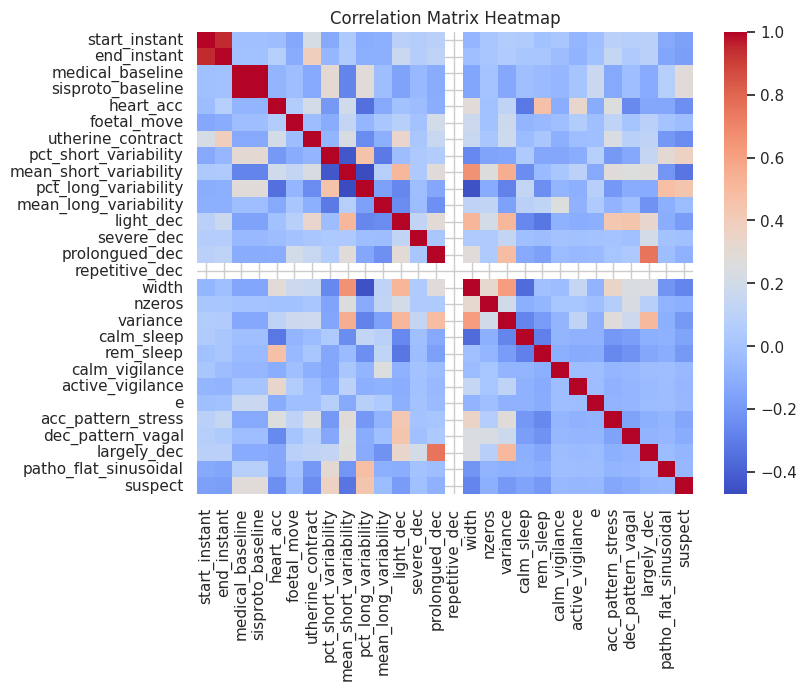

In [13]:
corr_matrix = df.drop(columns=['min', 'mean', 'max','nmax', 'mode', 'median']) \
    .corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")

La *heatmap* mostra come alcune variabili vengano influenzate tra di loro (correlazione). 
È importante notare come la correlazione non implichi sempre relazioni di causa-effetto, ma piusttosto come due variabili possano verificarsi insieme o influenzarsi reciprocamente. 


**largely_dec** e **prolongued_dec**: correlazione di 0.7578
Notiamo una relazione positiva tra la diminuzione significativa (largely_dec) e la diminuzione prolungata (prolongued_dec). Questa relazione può essere di particolare interesse nella valutazione della salute fetale, poiché una diminuzione significativa prolungata potrebbe essere associata a condizioni di stress o anomalie nel tracciato cardiografico.

**width** e **mean_short_variability**: correlazione di 0.6608
Questa correlazione moderatamente alta suggerisce una relazione positiva tra la larghezza (width) e la variabilità media a breve termine (mean_short_variability). Ciò potrebbe essere interessante da un punto di vista clinico, poiché un aumento della larghezza potrebbe essere associato a una maggiore variabilità nelle misurazioni cardiografiche a breve termine.

**variance** e **mean_short_variability**: correlazione di 0.5559
Questa correlazione moderata indica una relazione positiva tra la varianza (variance) e la variabilità media a breve termine (mean_short_variability). Ciò suggerisce che un aumento della varianza potrebbe essere associato a un aumento della variabilità nelle misurazioni cardiografiche a breve termine.

([<matplotlib.patches.Wedge at 0x7f634b48b6a0>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.3460397647298661, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

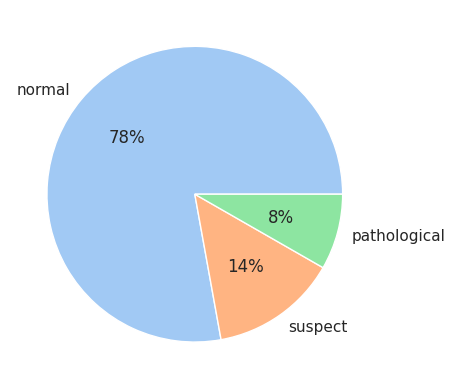

In [14]:
keys = ['normal', 'suspect', 'pathological']
palette_color = sns.color_palette('pastel')

plt.pie(df['nsp'].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')

Come si può notare dalla heatmap, esiste una una forte correlazione tra la variabile `width` e `mean_short_variability`, pari a:

In [15]:
corr_matrix['width']['mean_short_variability']

0.6608467767745067

<Axes: xlabel='width', ylabel='mean_short_variability'>

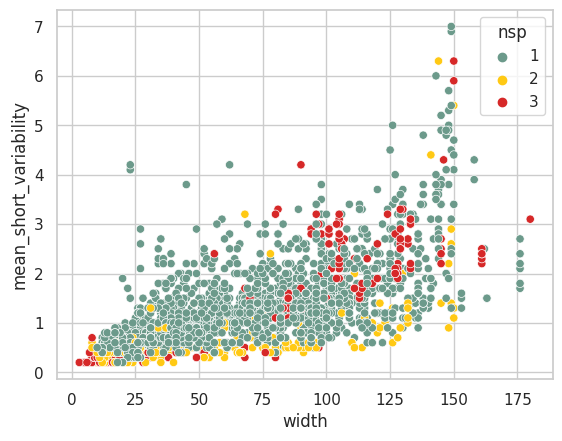

In [16]:
sns.scatterplot(data=df, x='width', y='mean_short_variability', hue='nsp', palette=['#6c9a8b', '#ffc914', '#d62828'])

La **"width"** rappresenta la durata delle onde nell'attività cardiaca fetale registrata. Potrebbe essere calcolata come la durata dell'onda P, la durata dell'onda QRS o altre onde specifiche nell'ECG fetale. La larghezza dell'onda ci permette di ottenere delle informazioni riguardo la conducibilità e sulla morfologia dell'attività cardiaca del neonato.

La **"mean_short_variability"** rappresenta invece la variabilità media a breve termine dell'attività cardiaca fetale. Questa variabile fa riferimento alla fluttuazione delle frequenze cardiache nel breve termine, calcolata come i battiti cardiaci consecutivi nell'arco di pochi minuti. La grande variabilità a breve termine è considerata un fattore di salute del neonato, dal momento in cui la variabilità è associata ad una migliore adattabilità del feto.

Da come si può vedere in questo grafico vi è una piccola regione in cui sono condensati una grande quantità di casi **patologici**, quando si ha il *mean_short_variability* compreso tra 1.70 circa e la *width* compresa tra 80 e 130 circa. 

Possiamo individuare una associazione moderata tra `mean_short_variability` e `variance`, in particolare il loro indice di correlazione è pari a:

In [17]:
corr_matrix['mean_short_variability']['variance']

0.5558524410341099

<Axes: xlabel='mean_short_variability', ylabel='variance'>

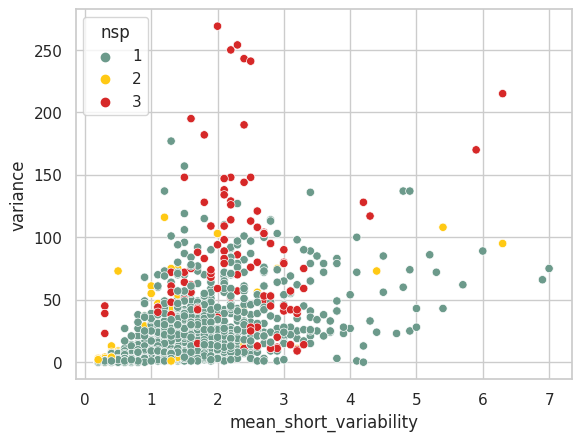

In [18]:
sns.scatterplot(data=df, x='mean_short_variability', y='variance', hue='nsp', palette=['#6c9a8b', '#ffc914', '#d62828'])

La **"variance"** è una misura statistica che rappresenta la dispersione dei dati intorno alla media.

Una *correlazione positiva* tra queste due variabili suggerisce che una maggiore *"variance"* è associata a una maggiore *"mean_short_variability"*. Ciò indica che le oscillazioni nella frequenza cardiaca fetale sono più variabili e presentano una maggiore dispersione intorno alla media durante il breve periodo di analisi.

La concentrazione principale dei casi "normal" (NSP) può variare a seconda dei dati specifici e delle caratteristiche del campione cardiotocografico analizzato. Tuttavia, in generale, si potrebbe osservare che i casi "normal" si concentrano in un intervallo di valori più bassi per entrambe le variabili. Ad esempio, potrebbero essere comuni valori di variance compresi tra 0 e 50 e valori di mean_short_variability tra 0 e 3 per i casi "normal".

D'altra parte, la concentrazione dei casi "patologici" (NSP) potrebbe manifestarsi in valori più elevati per entrambe le variabili. Ad esempio, potrebbero essere comuni valori di variance compresi tra 50 e 150 e valori di mean_short_variability compresi tra 1 e 3 per i casi "patologici".


È interessante notare anche l'apparente forte correlazione tra `largely_dec` e `prolongued_dec`, pari a:

In [19]:
corr_matrix['largely_dec']['prolongued_dec']

0.7577662756421346

Possiamo quindi effettuare un grafico per visualizzare la distribuzione dei valori (diagonale) e come si presenta l'output di `NSP` in base alla distribuzione dei due valori

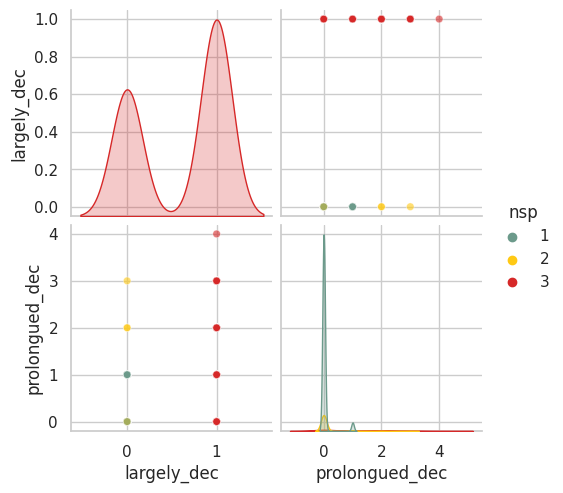

In [20]:
sns.pairplot(data=df, vars=['largely_dec', 'prolongued_dec'], hue='nsp',
             palette=['#6c9a8b', '#ffc914', '#d62828'],
             diag_kind="kde", plot_kws={'alpha': 0.6, 's': 30})

Per quanto le variabili risultano piuttosto correlate, questo potrebbe non indicare una diretta relazione di cause-effetto tra le due variabili. In particolare, essendo entrambe misure ricavate da momenti di decelerazione, la loro forte correlazione può piuttosto indicare come queste variabili possano verificarsi durante lo stesso fenomeno.

È però degno di nota come la variabile `NSP` sia sul livello di *pathological* quando la variabile booleana `largely_dec` sia impostata a 1, per ogni valore di `prolongued_dec`, mentre quando a 0, si può notare per valori superiori a 2 di `prolongued_dec` un comportamento sospetto.

## Modelli predittivi

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

Root Mean Squared Percentage Error 

In [22]:
def rmspe(y_real, y_pred):
    return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))

DESCRIVERE I VARI MODELLI E A COSA SERVONO

In [23]:
def print_eval(X, y, model):
    y_pred = model.predict(X)
    print(f"      MSE: {mean_squared_error(y, y_pred):12.4f}")
    print(f"R-squared: {r2_score(y, y_pred):12.4f}")
    print(f"    RMSPE: {rmspe(y, y_pred):12.4f}")

Definiamo ora una nuova funzione che ci permetterà di addestrare il modello attraverso i dati passati in input:
*  *X_train*
*  *y_train*

Una volta che il nostro modello sarà stato addestrato, andremo subito a verificare la sua correttezza tramite la funzione *print_eval*. Questa funzione contiene al suo interno un insieme di calcoli matematici che ci permettono di capire quanto il nostro modello sbagli. 

In [24]:
def fit_eval_tree(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print_eval(X_test, y_test, model=model)

### Modelli di studio
I modelli con la quale andremo a studiare il nostro dataset sono diversi, tra i tanti disponibili abbiamo deciso di utilizzare:
1. *Alberi decisionali*: RandomForestRegressor, DecisionTreeRegressor,  , XGBoost, GradientBoosting, LightGBM
2. *Classificazione multiclasse*:One-Vesus-All, Multinomial, SVM  

Per ogni modello bisogna commentare i vari valori ottenuti, la cosa ottima è provare anche diverse **depth** nei vari alberi, per quanto riguarda invece la classificazione, se le classi sono molto sbilanciate fornire una spiegazione approfondita di questo problema in quanto noi abbiamo molti NSP uguali a 0, con una conseguente sbilanciatura nel modello, aumentando quindi il peso nelle classi piu sbilanciate

### Alberi Decisionali

Prima di iniziare a realizzare i diversi modelli di classificazione, partiamo con il definire una funzione, *boosting_hyperparameters*, che ci permetterà di migliorare il nostro algoritmo. All'interno di questa funzione utilizzeremo la **Gried Search**, in modo da trovare i migliori **iper parametri** da utilizzare. 

In [25]:
def boosting_hyperparameters(classifier, params, cv, X_boosting, y_boosting, name):
  grid_search = GridSearchCV(classifier, params, cv=cv, scoring='accuracy')
  grid_search.fit(X_train if X_boosting is None else X_boosting,\
                  y_train if y_boosting is None else y_boosting)
  print(f"Grid Search: {grid_search}")
  print(f"Migliori iperparametri per {name}: {grid_search.best_params_}")
  print(f"Punteggio medio di cross-validation per {name} : {grid_search.best_score_}\n \n")
  return grid_search


Successivamente a ciò, possiamo iniziare a definire il valori che andremo ad utilizzare per addestrare e validare il nostro modello:
1. *X*: E' un data frame, dove all'interno troviamo tutte le colonne, eccetto una, **nsp**
2. *y*: E' una serie, composta da un solo valore, **nsp**

Queste due variabili verranno utilizzate per generare le *variabili di training* e le *variabili di testing*. 

In [26]:
df_dropped = df.drop(columns=["nsp"])
X = df_dropped
y = df["nsp"].astype(int)

In [27]:
X.head(5)

,start_instant,end_instant,medical_baseline,sisproto_baseline,heart_acc,foetal_move,utherine_contract,pct_short_variability,mean_short_variability,pct_long_variability,...,rem_sleep,calm_vigilance,active_vigilance,e,acc_pattern_stress,dec_pattern_vagal,largely_dec,patho_flat_sinusoidal,suspect,class
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,False,False,False,0,False,False,False,True,False,9
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,False,False,False,0,True,False,False,False,False,6
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,False,False,False,0,True,False,False,False,False,6
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,False,False,False,0,True,False,False,False,False,6
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,True,False,False,0,False,False,False,False,False,2


Un'operazione preliminare che dovremmo eseguire per lavorare su queste variabili è modificare il tipo dei valori nella variabile *y*, ponendo la tipologia del dato come **intero**, in questo modo potremo calcolare l'accuratezza del modello con le formule viste in precedenza.

In [28]:
y.head(5)

0    2
1    1
2    1
3    1
4    1
Name: nsp, dtype: int64

Una volta che abbiamo definito le nostre due variabili X ed y, possiamo adoperarci della funzione *train_test_split* per suddividere i dataset X e y, in variabili di training e variabili di testing. Da notare che specifichiamo in oltre anche il parametro *stratify=y*, con questa funzionalità andiamo a distribuire i valori di *y* nelle variabili di training e nelle variabili di test.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y,random_state=1926)

#### Random Forest

Il primo modello che andremo ad utilizzare per lavorare sul nostro dataset è il *Random Forest*.  

In [30]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

Il Random Forest che andremo ad utilizzare è **inizializzato con i seguenti iper parametri**:
1. ***max_samples***=0.2, specifica la **dimensione del subset di dati di addestramento da utilizzare** per ogni albero all'interno della Random Forest

2. ***max_features***="sqrt",  indica il n**umero massimo di features da considerare durante la ricerca** della migliore suddivisione dei nodi all'interno di ciascun albero della foresta 

3. ***n_estimators***=200, indica il **numero di alberi decisionali che verranno creati** all'interno dell'ensemble.

4. ***max_depth***=None, indica la **massima profondità consentita** per ciascun albero all'interno dell'ensemble

5. ***n_jobs***=-1, specifica il **numero di processori da utilizzare** per l'addestramento e la previsione dell'ensemble, in questo caso verranno usati tutti quelli disponibili

In [31]:
rfr = RandomForestRegressor(max_samples=0.2, max_features="sqrt", n_estimators=200, max_depth=None, n_jobs=-1)

Dopo aver inizializzato il nostro *RandomForestRegressor*, passiamo quindi a addestrare e verificare l'accuratezza di questo modello. 

In [32]:
fit_eval_tree(rfr, X_train, y_train, X_test, y_test)

      MSE:       0.0153
R-squared:       0.9595
    RMSPE:       0.0846


Da come si può notare il modello che abbiamo ottenuto un errore percentuale del 18%. Controlliamo ora l'importanza di ciascuna feature all'interno dell'albero. 

In [33]:
pd.Series(rfr.feature_importances_, index=X.columns).sort_values(ascending=False)

class                     0.284319
largely_dec               0.116773
patho_flat_sinusoidal     0.059646
pct_short_variability     0.056291
mean_short_variability    0.054680
mean                      0.051065
mode                      0.045366
pct_long_variability      0.036627
prolongued_dec            0.032885
median                    0.030697
suspect                   0.027695
e                         0.027599
heart_acc                 0.026005
variance                  0.021861
width                     0.014489
mean_long_variability     0.014039
calm_sleep                0.012741
min                       0.011225
utherine_contract         0.011098
sisproto_baseline         0.009213
end_instant               0.009151
max                       0.009037
start_instant             0.007344
medical_baseline          0.007178
foetal_move               0.005312
nmax                      0.004618
acc_pattern_stress        0.002603
dec_pattern_vagal         0.002428
light_dec           

[Text(0.5555555555555556, 0.875, 'pct_short_variability <= 59.5\nsquared_error = 0.354\nsamples = 257\nvalue = 1.307'),
 Text(0.3333333333333333, 0.625, 'pct_long_variability <= 52.5\nsquared_error = 0.076\nsamples = 187\nvalue = 1.083'),
 Text(0.2222222222222222, 0.375, 'mean <= 112.5\nsquared_error = 0.064\nsamples = 184\nvalue = 1.069'),
 Text(0.1111111111111111, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.375, 'squared_error = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(0.7777777777777778, 0.625, 'patho_flat_sinusoidal <= 0.5\nsquared_error = 0.602\nsamples = 70\nvalue = 1.909'),
 Text(0.6666666666666666, 0.375, 'mean <= 96.0\nsquared_error = 0.413\nsamples = 57\nvalue = 1.667'),
 Text(0.5555555555555556, 0.125, '\n  (...)  \n'),
 Text(0.7777777777777778, 0.125, '\n  (...)  \n'),
 Text(0.8888888888888888, 0.375, 'squared_error = 0.0\nsamples = 13\nvalue = 3.0')]

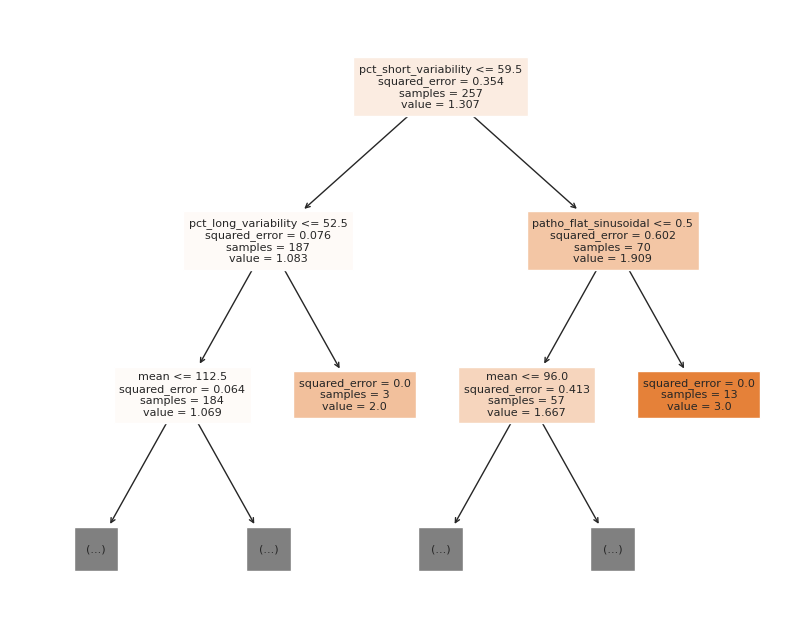

In [34]:
plt.figure(figsize=(10, 8))
plot_tree(rfr.estimators_[0], feature_names=X_train.columns, max_depth=2, filled=True, fontsize=8)

#### Boosting degli iper-parametri

In [35]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=1926)
boosting_hyperparameters(classifier=rf, params=rf_params, cv=5, X_boosting=None, y_boosting=None, name="Random Forest")

Grid Search: GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1926),
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')
Migliori iperparametri per Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Punteggio medio di cross-validation per Random Forest : 0.9816528144129796
 



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1926),
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

### Decision Forest Classifier

In [36]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [37]:
dtc = DecisionTreeRegressor(max_depth=5, random_state=1926)
fit_eval_tree(dtc, X_train, y_train, X_test, y_test)

      MSE:       0.0182
R-squared:       0.9520
    RMSPE:       0.0810


In [38]:
print(f"Profondita albero: {dtc.get_depth()}")
print(f"Numero di foglie : {dtc.get_n_leaves()}")

Profondita albero: 5
Numero di foglie : 12


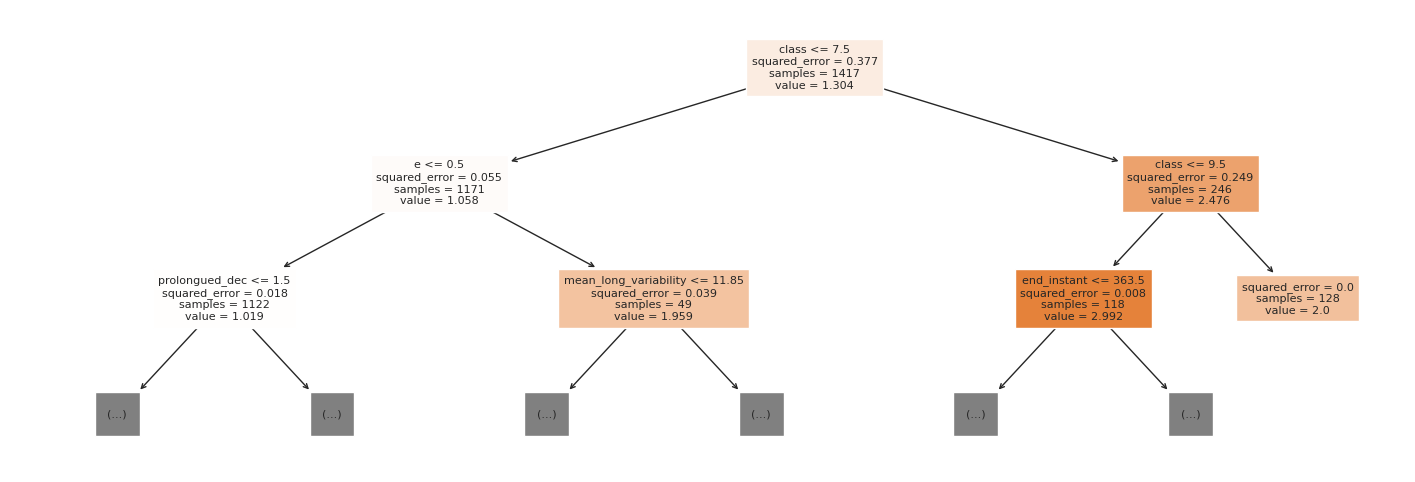

In [39]:
plt.figure(figsize=(18, 6))
plot_tree(dtc, feature_names=X.columns, max_depth=2, filled=True, fontsize=8);

In [40]:
dt_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Crea un oggetto Random Forest e un oggetto Grid Search
dfc = DecisionTreeClassifier(random_state=1926)
boosting_hyperparameters(classifier=dfc, params=dt_params, cv=5, X_boosting=None, y_boosting=None, name="Decision Tree")


Grid Search: GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1926),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')
Migliori iperparametri per Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Punteggio medio di cross-validation per Decision Tree : 0.9880007962972179
 



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1926),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### XGBoost

In [41]:
from xgboost import XGBRegressor, XGBClassifier

In [42]:
X_xgbtrain, X_xgbtest, y_xgbtrain, y_xgbtest = train_test_split(X[num_vars_low], y, test_size=1/3, stratify=y,random_state=1926)

In [43]:
xgbm = XGBRegressor(objective='reg:squarederror',reg_alpha=0.0, reg_lambda=1.0, n_estimators=200, verbose_eval=True)
fit_eval_tree(xgbm, X_xgbtrain, y_xgbtrain, X_xgbtest, y_xgbtest)


[18:50:50] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

      MSE:       0.0460
R-squared:       0.8785
    RMSPE:       0.1477


In [44]:
xgb_model = XGBClassifier()
y_boosting = np.subtract(y_xgbtrain, 1)
# Define the hyperparameters grid for grid search
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

boosting_hyperparameters(classifier=xgb_model, params=params_grid, cv=5, X_boosting=X_xgbtrain,  y_boosting=y_boosting, name="XGBoost")

Grid Search: GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5], 'n_estimators': [100, 200, 300]},
             scoring='accuracy')

### CatBoosting

In [45]:
#pip install catboost

In [46]:
from catboost import CatBoostRegressor
cat_vars_low

ModuleNotFoundError: ignored

In [ ]:
catbm = CatBoostRegressor(n_estimators=1926, cat_features=['class', 'tendency'])
fit_eval_tree(catbm, X_train, y_train, X_test, y_test)

In [ ]:
catbm.score(X_test, y_test)

ASSURDO !! COMMRNTARE STA ROBA 

### Modelli di Classificazione
Per i modelli di classificazione, per mantenere il numero delle classi di `NSP` costanti all'interno di ogni fold, è necessario utilizzare una `StratifiedKFold`.


In [47]:
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
skf = StratifiedKFold(3, shuffle=True, random_state=1926)

A questo punto possiamo definire una funzione per poter agevolmente calcolare i risultati della Cross Validation di modelli di classificazione.

In [48]:
def cross_validate_class(model, X, y, cv=skf) -> pd.DataFrame:
    """ Returns the mean of the `test_score` parameter
        applying the cross validation given in input """
    cv_results = cross_validate(model, X, y, cv=cv)
    return np.mean(cv_results['test_score'])

def grid_search_class(model, grid, X_train, y_train, cv=skf):
    gs = GridSearchCV(model, grid, cv=cv)
    gs.fit(X_train, y_train)
    return (
        gs,
        pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', ascending=False).head()
    )

##### Classificazione Lineare
Inizialmente testiamo un modello di classificazione molto semplice di classificazione Lineare, avvalendoci dell'algoritmo di apprendimento `Perceptron`.

In [49]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=1926)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3342736248236953

Per i modelli di classificazione, è importante adottare misurazioni differenti. In questo caso è interessante controllare lo stato della **_Confusion Matrix_**

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

labels = { 1: 'Normal', 2: 'Suspect', 3: 'Pathological' }

def get_confusion_matrix(model, y_true, y_pred, normalize=None):
    cm = pd.DataFrame(
        confusion_matrix(y_true, y_pred, normalize=normalize),
        index=model.classes_, columns=model.classes_
    )

    cm.index = [ labels[i] for i in cm.index ]
    cm.columns = [ labels[i] for i in cm.columns ]
    return cm

def get_percentage_cm(cm: pd.DataFrame)-> pd.DataFrame:
    return (cm * 100).round(2).astype(str) + '%'

def get_coefficients_frame(gs, idx):
    return pd.DataFrame(
        {
            "Normal": gs.best_estimator_['regr'].coef_[0],
            "Suspect": gs.best_estimator_['regr'].coef_[1],
            "Pathological": gs.best_estimator_['regr'].coef_[2],
        }, index=idx
    )

In [52]:
get_confusion_matrix(model, y_test, model.predict(X_test))

,Normal,Suspect,Pathological
Normal,125,191,236
Suspect,4,75,19
Pathological,0,22,37


La *confusion matrix* rispecchia la conformazione del dataset, ovvero che lo sbilanciamento delle classi di `NSP` porta inevitabilmente ad uno squilibrio nella predizione di classi. In questo caso, il modello `Perceptron` per sopperire allo sbilianciamento di record con classi `Suspect` e `Patological`, mostra risultati perggiori nella classe `Normal` e una piuttosto forte inclinazione verso `Pathological`.

Potrebbe essere più d'aiuto visualizzare i dati in percentuale.


In [54]:
cm_perc = get_percentage_cm(
    get_confusion_matrix(model, y_test, model.predict(X_test), normalize='true'))

cm_perc

,Normal,Suspect,Pathological
Normal,22.64%,34.6%,42.75%
Suspect,4.08%,76.53%,19.39%
Pathological,0.0%,37.29%,62.71%


Proviamo ora ad effettuare una Grid Search per individuare i migliori iperparametri. In particolare, `Perceptron`:
- Utilizza una funzione di regolarizzazione (`penalty`) variabile tra:
  - `l1`
  - `l2`
  - `elasticnet`
    - tramite `l1_ratio` si gestisce il peso della regolarizzazione l1.
- Specifcare il parametro `alpha` delle regolarizzazioni
- `fit_intercept`

Effettuiamo anche valutazioni sull'utilizzo di filtri per la normalizzazione dei dati attraverso `StandardScale` e `MinMaxScaler`, oppure nessuno.

In [57]:
perc = Pipeline([
    ('scale', None),
    ('regr', Perceptron(random_state=1926))
])

grid = [
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['l1', 'l2'],
        'regr__alpha': np.logspace(-5, 3, 9),
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['elasticnet'],
        'regr__alpha': np.logspace(-5, 3, 9),
        'regr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': [None]
    }
]

gs, result = grid_search_class(perc, grid, X_train, y_train)

I migliori parametri trovati sono

In [58]:
result.iloc[0]['params']

{'regr__alpha': 1e-05,
 'regr__fit_intercept': False,
 'regr__l1_ratio': 0.5,
 'regr__penalty': 'elasticnet',
 'scale': MinMaxScaler()}

Utilizzando `elasticnet` con `l1_ratio` pari a 0.5, significa che è stata utilizzata anche al regolarizzazione Lasso, la quale può aver eliminato le features meno importanti.

In [59]:
gs.best_estimator_['regr'].coef_
get_coefficients_frame(gs, X.columns)

,Normal,Suspect,Pathological
start_instant,6.016332,-6.661470,0.207741
end_instant,-2.225219,-0.429192,0.697612
medical_baseline,-5.496406,2.849283,1.740522
sisproto_baseline,-5.496406,2.849283,1.740522
heart_acc,4.074393,-3.644429,-0.375241
foetal_move,-3.250419,2.863981,0.000000
utherine_contract,-0.864958,0.646082,-0.901096
pct_short_variability,-2.989835,1.998034,-0.215649
mean_short_variability,2.927713,-2.640532,-0.699514
pct_long_variability,-6.653299,5.455237,1.667427


Notiamo come, siccome è stata scelta nel modello migliore la regolarizzazione `l1`, alcune features si sono azzerate, specialemte per quanto riguarda la predizione della classe `Pathological`. Questa scelta di parametri ha portato ad un *confusion matrix*:

In [60]:
cm = get_confusion_matrix(gs, y_test, gs.predict(X_test), normalize='true')
get_percentage_cm(cm)

,Normal,Suspect,Pathological
Normal,98.91%,1.09%,0.0%
Suspect,5.1%,94.9%,0.0%
Pathological,0.0%,1.69%,98.31%


Notiamo subito che:
- I risultati per la classe `Normal` sono migliorati notevolmente: i parametri sono stati pesati in modo tale da redistribuire i pesi e premiare la predizione della classe `Normal`.
- I risultati per classe `Suspect` sono invece migliorati, ma rimanendo poco più bassi rispetto alle altre classi. Questo ci può far pensare che per via dei miglioramenti nelle altre categorie, gli individui sospetti risultano ora più difficili da individuare. Questo può essere notato anche nei diversi pesi utilizzati per i coefficienti $\mathbf{w}$ del modello individuato, dove per esempio, la feature `prolongued_dec` assume in valore assoluto il valore più alto, ma nelle due classi ha segno opposto.
- I risultati per la classe `Pathological` sono invece nettamente migliorati, rendendo il modello pressoché infallibile nel creare un falso `Pathological`, e avere una percentuale più del 98% nella predizione di un soggetto patologoico; tutto questo nonostante i dati per quest'ultima categoria sono molto limitati.

Testiamo ora un modello di **regressione logistica**, il quale si basa sulla probabilità di appartenenza di una classe per ogni istanza del training set. Di default viene utilizzata la regolarizzazione `l1`, e oltre ad impostare il *random_state*, impostiamo anche 

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1926, solver='saga')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=1926, solver='saga')

In [62]:
get_percentage_cm(
    get_confusion_matrix(model, y_test, model.predict(X_test), normalize='true'))

,Normal,Suspect,Pathological
Normal,98.55%,1.27%,0.18%
Suspect,67.35%,32.65%,0.0%
Pathological,42.37%,32.2%,25.42%


È interessante notare come, similmente al modello precedente, la mal predizione di un soggetto patologico in un soggetto normale o sospetto è pressochè nulla (terza colonna, prime due righe), mentre in questo modello di regressione logistica, le accuratetzze sui casi sospetti e patologici sono scese drasticamente.

Procediamo ad effettuare *tuning* degli iperparametri del modello

In [63]:
log_reg = Pipeline([
    ('scale', None),
    ('regr', LogisticRegression(solver='saga', random_state=1926, ))
])

grid = [
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['l1', 'l2'],
        'regr__C': np.logspace(-5, 3, 9),
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['elasticnet'],
        'regr__C': np.logspace(-5, 3, 9),
        'regr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': [None]
    }
]

gs, score = grid_search_class(log_reg, grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [64]:
score.iloc[0]['params']

{'regr__C': 1.0,
 'regr__fit_intercept': False,
 'regr__l1_ratio': 0.5,
 'regr__penalty': 'elasticnet',
 'scale': StandardScaler()}

È risultato più efficiente un mix di regolarizzazione Ridge e Lasso al 50%, risultando nel calcolo dei seguenti pesi:

In [65]:
get_coefficients_frame(gs, X.columns)

,Normal,Suspect,Pathological
start_instant,0.505188,-0.555378,0.009231
end_instant,-0.198634,0.086504,0.087788
medical_baseline,-0.399361,0.167325,0.191079
sisproto_baseline,-0.399361,0.167325,0.191079
heart_acc,0.118183,-0.272782,0.117056
foetal_move,-0.056336,0.120599,-0.023467
utherine_contract,0.003541,0.082300,-0.109182
pct_short_variability,-0.281987,0.339945,-0.037108
mean_short_variability,0.040506,-0.072527,0.000000
pct_long_variability,-0.465241,0.309456,0.114755


È da subito evidente come il non utilizzo di una regolarizzazione Lasso pura abbia portato all'azzeramento di molte meno variabili.

In [68]:
get_percentage_cm(
    get_confusion_matrix(gs, y_test, gs.predict(X_test), normalize='true')
)

,Normal,Suspect,Pathological
Normal,99.28%,0.72%,0.0%
Suspect,5.1%,94.9%,0.0%
Pathological,0.0%,1.69%,98.31%


In [69]:
gs.score(X_test, y_test)

0.9858956276445698